<a href="https://colab.research.google.com/github/SagarThomas24/ML_projects/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy tensorflow tensorflow-decision-forests

import os

os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

In [3]:
df_221=pd.read_csv('/content/drive/MyDrive/MIMIC.zip (Unzipped Files)/221.csv')

df_221.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,28,81,120,98,74,73,0
1,29,81,120,98,74,73,0
2,30,81,120,98,74,73,0
3,30,81,120,99,74,73,0
4,29,81,120,99,73,73,0


In [4]:
df_230 = pd.read_csv('/content/drive/MyDrive/MIMIC.zip (Unzipped Files)/230.csv')

df_230.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,15,54,73,97,72,71,0
1,15,54,73,97,72,71,0
2,15,54,73,97,72,71,0
3,15,54,73,97,72,71,0
4,15,55,74,97,72,71,0


In [5]:
df_221.shape

(24999, 7)

In [6]:
df_230.shape

(25000, 7)

In [7]:
df_221.drop_duplicates(inplace=True)
df_230.drop_duplicates(inplace=True)

In [8]:
df_221.shape

(15554, 7)

In [9]:
df_230.shape

(8449, 7)

In [10]:


df_230.isnull().values.any()


False

In [11]:
df_221.isnull().values.any()


False

In [12]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data for df_221
df_221_new = pd.DataFrame(scaler.fit_transform(df_221), columns=df_221.columns)

# Fit and transform the data for df_230
df_230_new= pd.DataFrame(scaler.fit_transform(df_230), columns=df_230.columns)


In [13]:
df_221_new

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,0.666667,0.245902,0.390244,0.98,0.616667,0.613445,0.0
1,0.690476,0.245902,0.390244,0.98,0.616667,0.613445,0.0
2,0.714286,0.245902,0.390244,0.98,0.616667,0.613445,0.0
3,0.714286,0.245902,0.390244,0.99,0.616667,0.613445,0.0
4,0.690476,0.245902,0.390244,0.99,0.608333,0.613445,0.0
...,...,...,...,...,...,...,...
15549,0.642857,0.213115,0.304878,0.99,0.766667,0.781513,0.0
15550,0.642857,0.213115,0.329268,0.99,0.766667,0.781513,0.0
15551,0.642857,0.229508,0.341463,0.99,0.775000,0.781513,0.0
15552,0.642857,0.229508,0.329268,1.00,0.775000,0.806723,0.0


In [14]:
df_230_new

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,0.357143,0.097701,0.127273,0.888889,0.549618,0.229730,0.0
1,0.357143,0.103448,0.133333,0.888889,0.549618,0.229730,0.0
2,0.333333,0.097701,0.127273,0.888889,0.549618,0.229730,0.0
3,0.333333,0.097701,0.127273,0.888889,0.541985,0.229730,0.0
4,0.333333,0.097701,0.121212,0.888889,0.549618,0.229730,0.0
...,...,...,...,...,...,...,...
8444,0.452381,0.132184,0.187879,0.666667,0.671756,0.445946,0.0
8445,0.500000,0.137931,0.193939,0.666667,0.671756,0.459459,0.0
8446,0.500000,0.143678,0.200000,0.666667,0.671756,0.459459,0.0
8447,0.452381,0.155172,0.206061,0.666667,0.671756,0.459459,0.0


In [15]:
Q1 = df_221_new.quantile(0.25)
Q3 = df_221_new.quantile(0.75)
IQR = Q3 - Q1
df_221_outliers = df_221_new[((df_221_new < (Q1 - 1.5 * IQR)) |(df_221_new > (Q3 + 1.5 * IQR))).any(axis=1)]





In [16]:
Q1 = df_230_new.quantile(0.25)
Q3 = df_230_new.quantile(0.75)
IQR = Q3 - Q1
df_230_outliers = df_230_new[((df_230_new < (Q1 - 1.5 * IQR)) |(df_230_new > (Q3 + 1.5 * IQR))).any(axis=1)]

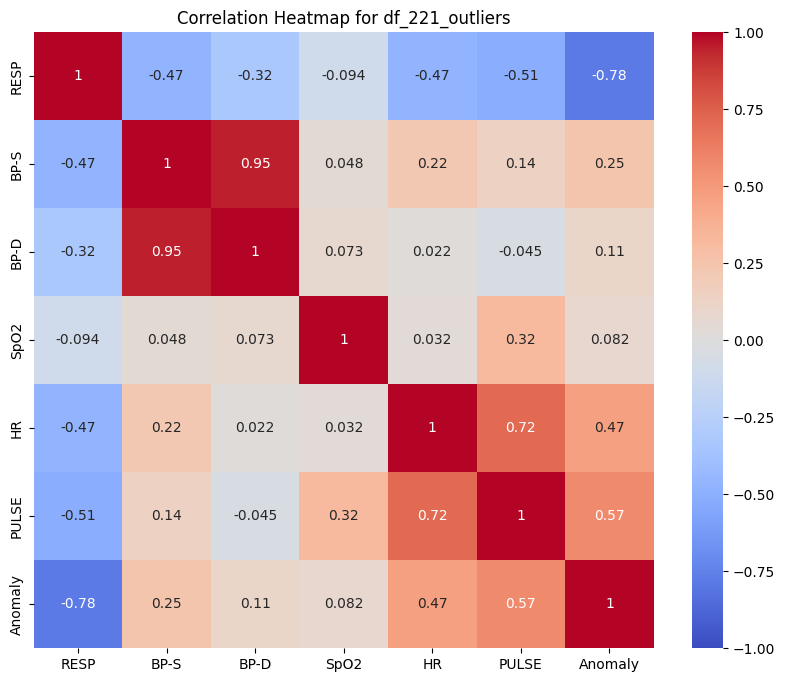

Similar features with correlation above 0.7:
BP-S and BP-D: 0.95
HR and PULSE: 0.72

Similar features with correlation below -0.7:
RESP and Anomaly: -0.78


In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_221_outliers.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for df_221_outliers')
plt.show()

# Identify similar features
threshold = 0.7
similar_features_above = []
similar_features_below = []

for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    correlation = corr_matrix.iloc[i, j]
    if correlation >= threshold:
      similar_features_above.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))
    elif correlation <= -threshold:
      similar_features_below.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))

print("Similar features with correlation above 0.7:")
for feature1, feature2, corr in similar_features_above:
  print(f"{feature1} and {feature2}: {corr:.2f}")

print("\nSimilar features with correlation below -0.7:")
for feature1, feature2, corr in similar_features_below:
  print(f"{feature1} and {feature2}: {corr:.2f}")


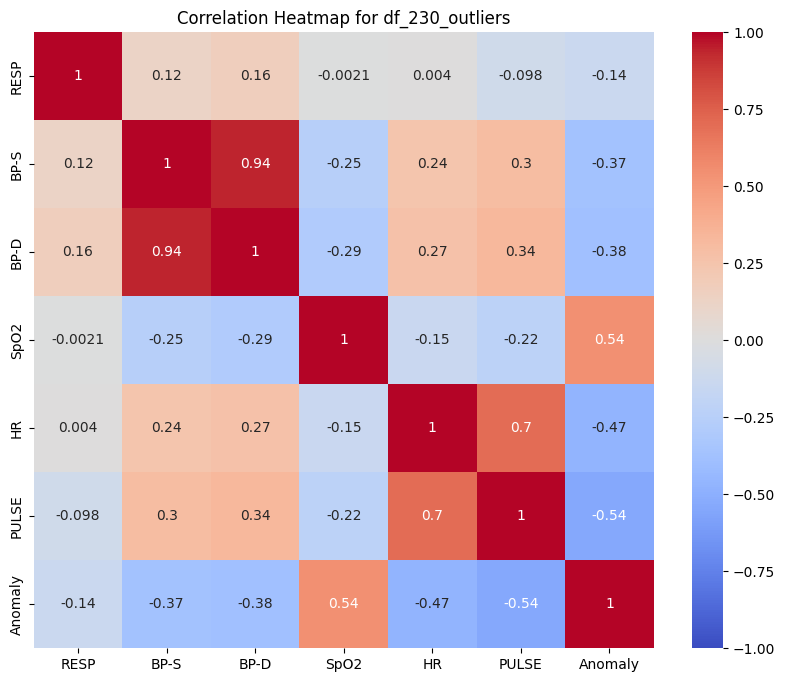

Similar features with correlation above 0.7:
BP-S and BP-D: 0.94

Similar features with correlation below -0.7:


In [18]:

# Calculate the correlation matrix
corr_matrix = df_230_outliers.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for df_230_outliers')
plt.show()

# Identify similar features
threshold = 0.7
similar_features_above = []
similar_features_below = []

for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    correlation = corr_matrix.iloc[i, j]
    if correlation >= threshold:
      similar_features_above.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))
    elif correlation <= -threshold:
      similar_features_below.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))

print("Similar features with correlation above 0.7:")
for feature1, feature2, corr in similar_features_above:
  print(f"{feature1} and {feature2}: {corr:.2f}")

print("\nSimilar features with correlation below -0.7:")
for feature1, feature2, corr in similar_features_below:
  print(f"{feature1} and {feature2}: {corr:.2f}")


In [19]:
#checking if there is any anomly of 1 meaning death


if df_221_outliers.isin([1]).any().any():
  print("Anomaly with value 1 is present in df_221_outliers.")
else:
  print("No anomaly with value 1 is present in df_221_outliers.")

if df_230_outliers.isin([1]).any().any():
  print("Anomaly with value 1 is present in df_230_outliers.")
else:
  print("No anomaly with value 1 is present in df_230_outliers.")


Anomaly with value 1 is present in df_221_outliers.
Anomaly with value 1 is present in df_230_outliers.


In [24]:
''' Q1'''

#implementing id3 on scikit learn library

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X = df_221_outliers.drop('Anomaly', axis=1)  #dropping the anomaly column
y = df_221_outliers['Anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



id3_model = DecisionTreeClassifier(criterion='entropy')

# Train the model
id3_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = id3_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




Accuracy: 0.9983606557377049


In [21]:
import math
from collections import Counter

# Function to calculate entropy
def calculate_entropy(data, target_column):

    labels = data[target_column]

    # Count the occurrences of each class label (0 and 1 for 'Anomaly')
    label_counts = Counter(labels)

    total_count = len(labels)  # Total number of samples
    entropy = 0

    # Calculate entropy
    for count in label_counts.values():
        prob = count / total_count  # Probability of the class
        entropy -= prob * math.log2(prob)  # Entropy formula

    return entropy

